# Disaster Prone Area Classification

In [1]:
# import the necessary libraries
import pandas as pd
import numpy as np
import random

In [2]:
# Seed for reproducibility
np.random.seed(42)

# Sample Indian states
states = ['Bihar', 'Uttar Pradesh', 'West Bengal', 'Assam', 'Gujarat', 'Maharashtra', 
          'Tamil Nadu', 'Kerala', 'Odisha', 'Andhra Pradesh', 'Punjab', 'Rajasthan', 
          'Madhya Pradesh', 'Jharkhand', 'Chhattisgarh', 'Karnataka', 'Haryana', 'Delhi']

# Function to create one record
def generate_row():
    state = random.choice(states)
    latitude = round(np.random.uniform(8.0, 37.0), 4)
    longitude = round(np.random.uniform(68.0, 97.0), 4)
    elevation = np.random.randint(0, 3000)  # meters
    disaster_score = np.random.randint(0, 10)
    population_density = np.random.randint(50, 3000)
    urbanization_level = np.random.randint(1, 11)
    house_affected = np.random.randint(0, 50000)
    human_death = np.random.randint(0, 1000)

    # Compute a simple risk score
    risk_score = disaster_score + (population_density // 1000) + \
                 (house_affected // 10000) + (human_death // 100)
    
    if risk_score >= 10:
        risk_label = 'High'
    elif 5 <= risk_score < 10:
        risk_label = 'Medium'
    else:
        risk_label = 'Low'

    return [state, latitude, longitude, elevation, disaster_score, population_density,
            urbanization_level, house_affected, human_death, risk_label]

# Generate 5000 records
data = [generate_row() for _ in range(5000)]

# Create DataFrame
columns = ['State', 'Latitude', 'Longitude', 'Elevation', 'Disaster_History_Score',
           'Population_Density', 'Urbanization_Level', 'House_Affected', 'Human_Death', 'Disaster_Risk_Label']

df = pd.DataFrame(data, columns=columns)

# Save the dataset
df.to_csv("disaster_prone_area_dataset.csv", index=False)
print("✅ Dataset saved as 'disaster_prone_area_dataset.csv'")


✅ Dataset saved as 'disaster_prone_area_dataset.csv'


In [3]:
df.head()

,State,Latitude,Longitude,Elevation,Disaster_History_Score,Population_Density,Urbanization_Level,House_Affected,Human_Death,Disaster_Risk_Label
0,Jharkhand,18.8617,95.5707,1130,7,1688,10,16850,214,High
1,Jharkhand,9.6844,93.1191,2919,7,180,6,769,343,High
2,Bihar,32.1408,74.1578,1215,4,1234,10,28693,252,Medium
3,Jharkhand,20.5264,76.4456,1082,9,2097,3,1899,566,High
4,Madhya Pradesh,36.5137,81.5361,646,4,2938,7,21777,387,High


In [4]:
# describe the dataset
df.describe()

,Latitude,Longitude,Elevation,Disaster_History_Score,Population_Density,Urbanization_Level,House_Affected,Human_Death
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,22.496568,82.488012,1507.277400,4.585000,1543.631800,5.562400,24966.602000,500.951400
std,8.489479,8.363261,867.767494,2.877643,853.193552,2.853653,14424.590537,288.147699
min,8.003900,68.003600,1.000000,0.000000,50.000000,1.000000,2.000000,0.000000
25%,15.112000,75.338525,749.000000,2.000000,817.750000,3.000000,12185.250000,249.000000
50%,22.646750,82.588000,1511.500000,5.000000,1545.000000,6.000000,24937.500000,500.000000
75%,29.747025,89.676425,2260.000000,7.000000,2294.250000,8.000000,37410.250000,753.000000
max,36.984600,96.994300,2999.000000,9.000000,2999.000000,10.000000,49999.000000,999.000000


In [5]:
# data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   5000 non-null   object 
 1   Latitude                5000 non-null   float64
 2   Longitude               5000 non-null   float64
 3   Elevation               5000 non-null   int64  
 4   Disaster_History_Score  5000 non-null   int64  
 5   Population_Density      5000 non-null   int64  
 6   Urbanization_Level      5000 non-null   int64  
 7   House_Affected          5000 non-null   int64  
 8   Human_Death             5000 non-null   int64  
 9   Disaster_Risk_Label     5000 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 390.8+ KB


In [6]:
df.shape

(5000, 10)

# Exploratory Data Analysis

In [7]:
# Check for missing values
df.isnull().sum()


State                     0
Latitude                  0
Longitude                 0
Elevation                 0
Disaster_History_Score    0
Population_Density        0
Urbanization_Level        0
House_Affected            0
Human_Death               0
Disaster_Risk_Label       0
dtype: int64

# Distribution of Disaster Risk Labels

C:\Users\asus\AppData\Local\Temp\ipykernel_12664\2950394254.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Disaster_Risk_Label', palette='Set2')


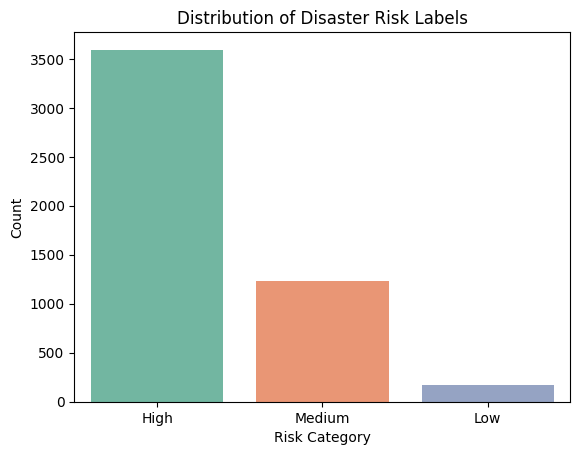

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
# Count plot for disaster risk labels
sns.countplot(data=df, x='Disaster_Risk_Label', palette='Set2')
plt.title("Distribution of Disaster Risk Labels")
plt.xlabel("Risk Category")
plt.ylabel("Count")
plt.show()


# Distribution of States in Dataset

C:\Users\asus\AppData\Local\Temp\ipykernel_12664\1515887913.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='State', order=df['State'].value_counts().index, palette='coolwarm')


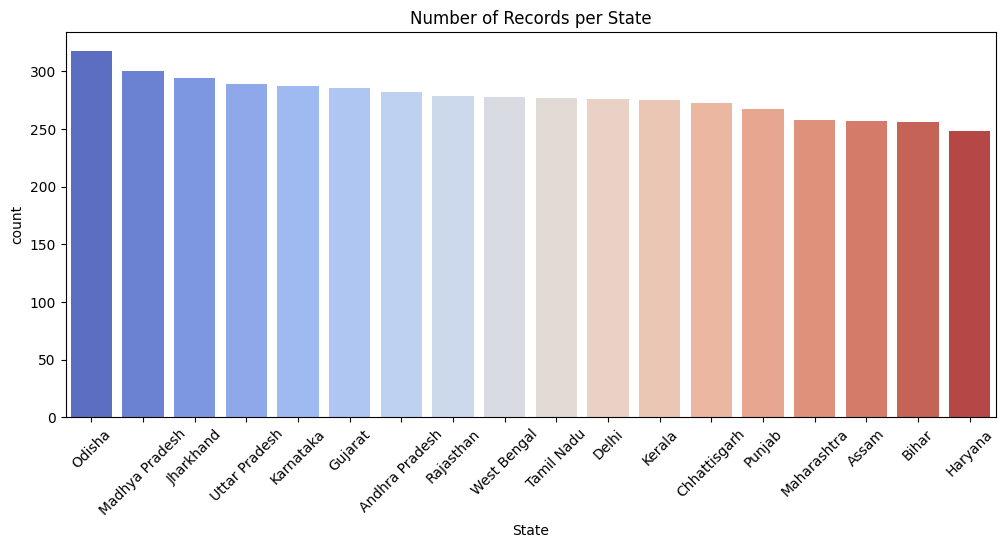

In [9]:
# Count plot for states
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='State', order=df['State'].value_counts().index, palette='coolwarm')
plt.title("Number of Records per State")
plt.xticks(rotation=45)
plt.show()


In [10]:
from sklearn.preprocessing import LabelEncoder
df_encoded = df.copy()

# Encode 'State' and 'Disaster_Risk_Label'
le_state = LabelEncoder()
le_label = LabelEncoder()

df_encoded['State'] = le_state.fit_transform(df_encoded['State'])
df_encoded['Disaster_Risk_Label'] = le_label.fit_transform(df_encoded['Disaster_Risk_Label'])


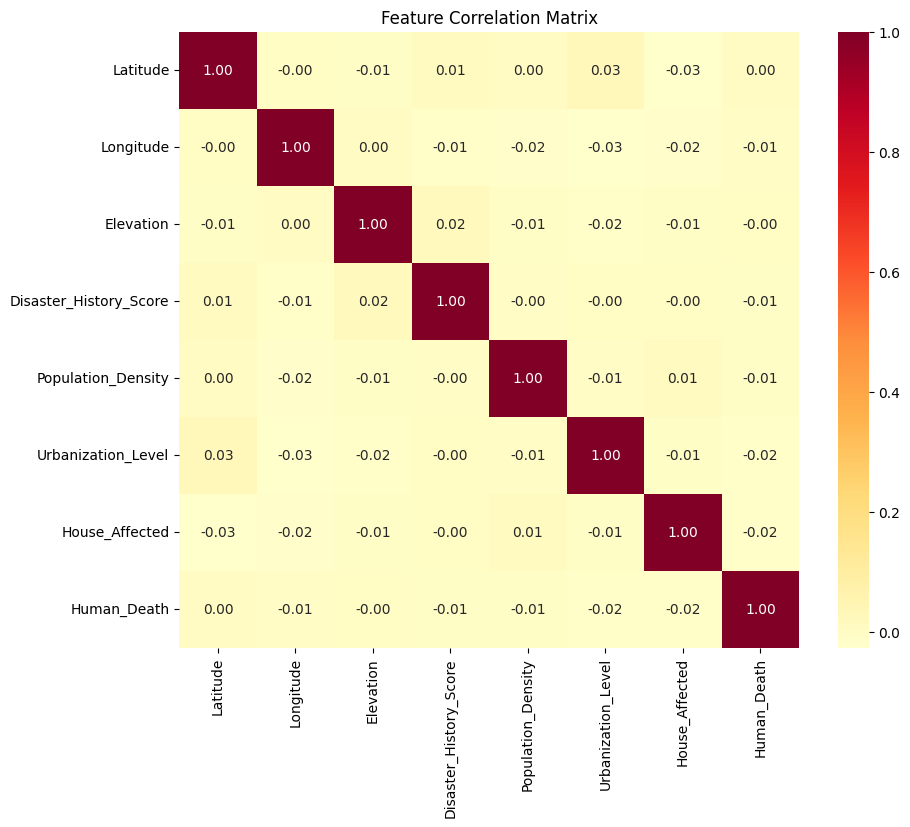

In [11]:
# Select only numeric columns for correlation
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation
plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='YlOrRd', fmt='.2f')
plt.title("Feature Correlation Matrix")
plt.show()

In [12]:
df = pd.get_dummies(df, columns=['State'], prefix='State')


In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Select only numeric columns
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Step 2: Compute correlation matrix
corr_matrix = df_numeric.corr()

# Step 3: Remove columns with any negative correlation
filtered_corr = corr_matrix.loc[:, (corr_matrix >= 0).all()]

# Step 4: Check if it's empty before plotting
if filtered_corr.empty:
    print("No columns with only non-negative correlation found.")
else:
    plt.figure(figsize=(10, 8))
    sns.heatmap(filtered_corr, annot=True, cmap='YlOrRd', fmt='.2f')
    plt.title("Feature Correlation Matrix (Negative Correlations Removed)")
    plt.show()


No columns with only non-negative correlation found.


In [14]:
# Sample calculation for disaster history score

def calculate_disaster_history_score(frequency, severity, impact, recovery, weights=(1, 1, 1, 1)):
    # Calculate weighted disaster history score
    score = (frequency * weights[0]) + (severity * weights[1]) + (impact * weights[2]) + (recovery * weights[3])
    return score

# Example data
frequency = 5  # number of disasters in the last 10 years
severity = 8  # average severity (scale of 1 to 10)
impact = 10  # average economic loss (scaled)
recovery = 2  # recovery time in years (lower is better)

# Calculate score with equal weights
disaster_history_score = calculate_disaster_history_score(frequency, severity, impact, recovery)

print(f"Disaster History Score: {disaster_history_score}")


Disaster History Score: 25


#  Pairplot for Visualizing Trends

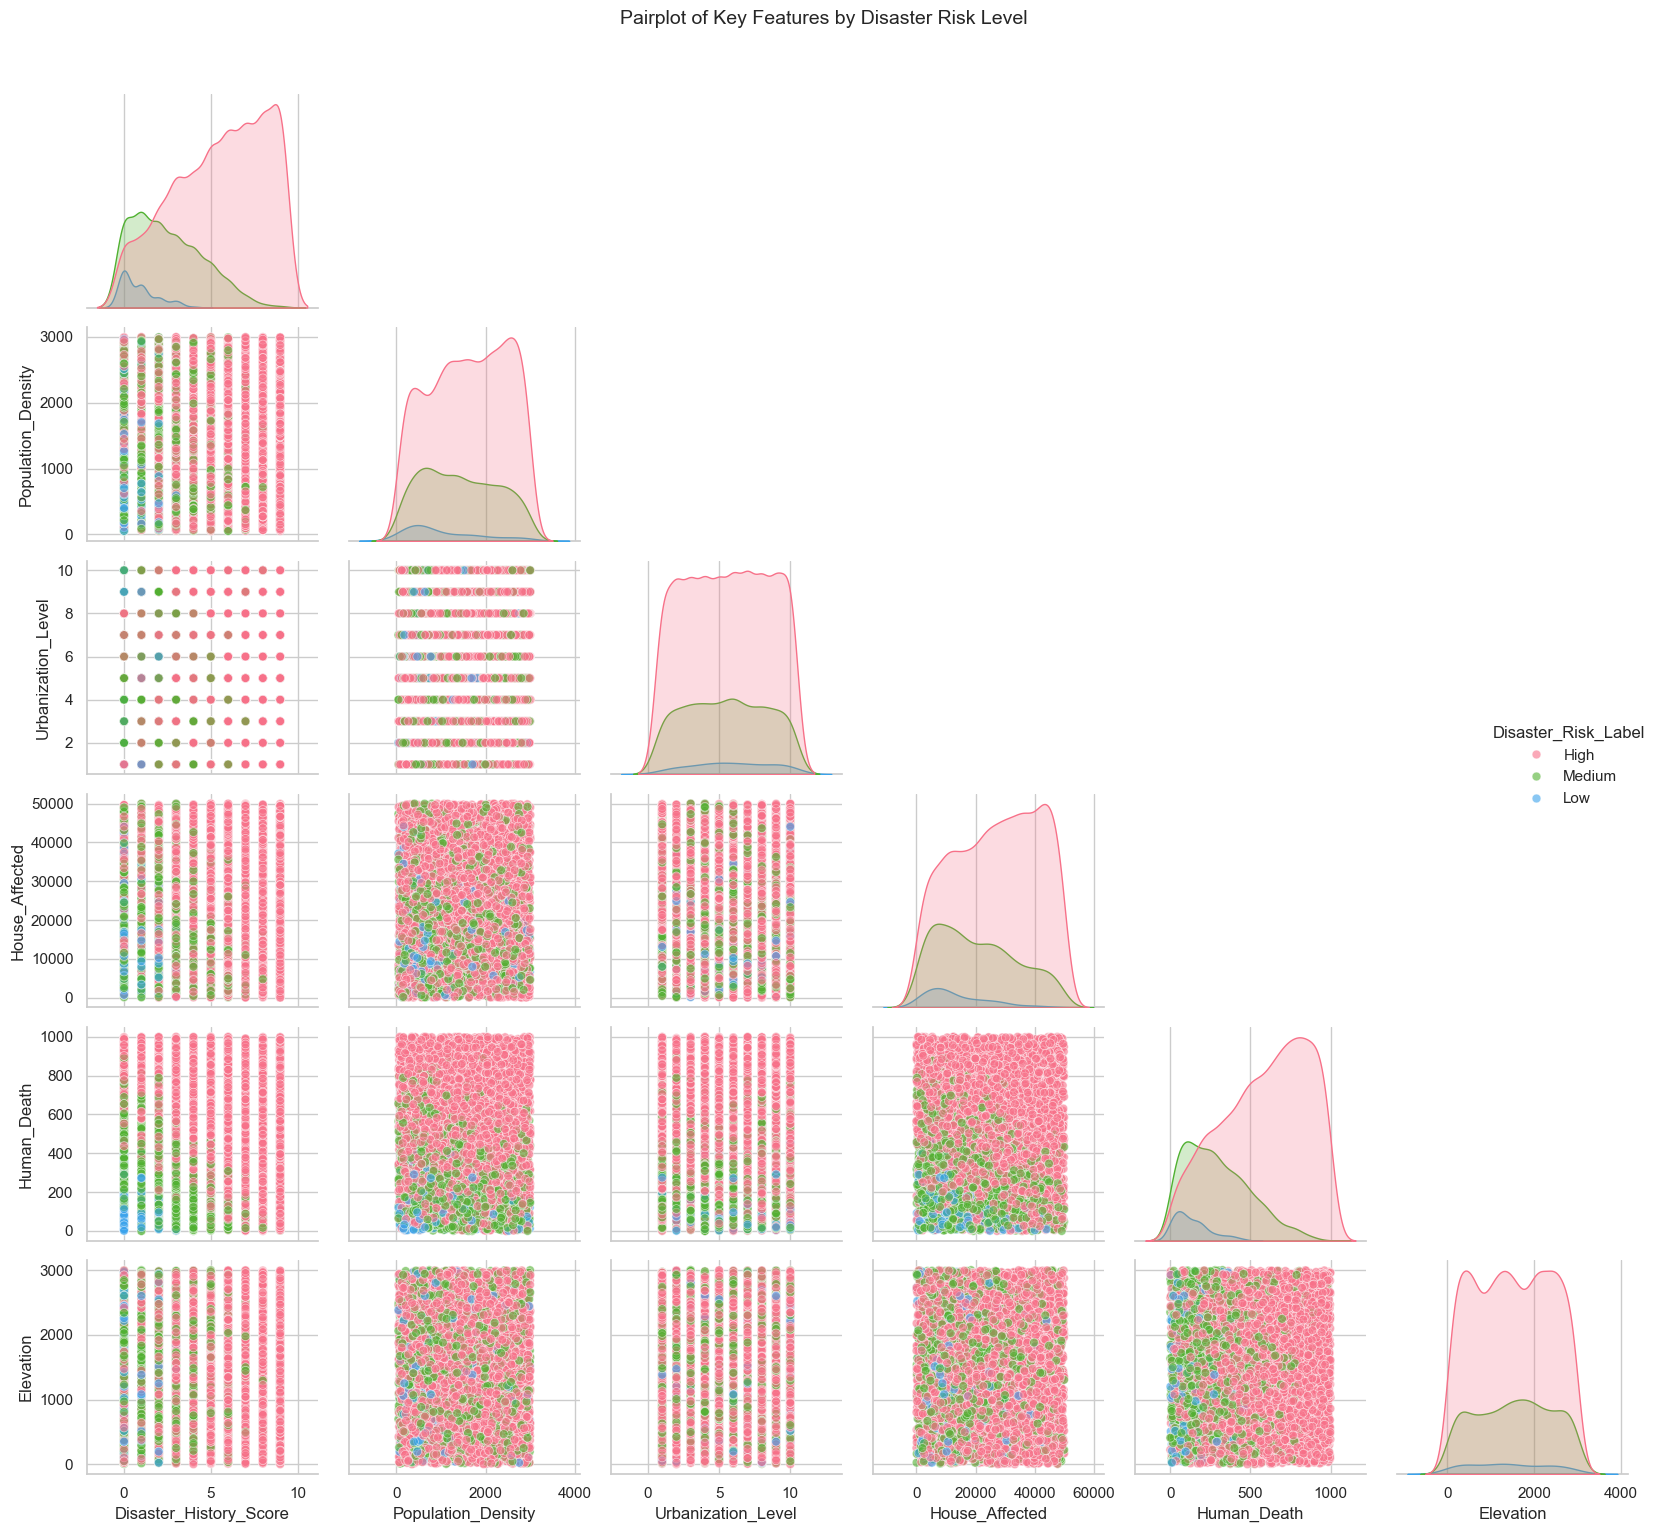

In [15]:
# Set style
sns.set(style="whitegrid")

# Prepare input DataFrame with CORRECT feature names (Ensure variables are initialized)
input_df = pd.DataFrame([{
    'Population_Density',
    'Urbanization_Level',
    'House_Affected',  # Correct feature name
    'Human_Death',             # Correct feature name
    'Elevation',
    'Disaster_Risk_Label',
    'Disaster_History_Score'
}])

# Ensure 'Disaster_Risk_Label' is string type for hue (if not already)
df['Disaster_Risk_Label'] = df['Disaster_Risk_Label'].astype(str)

# Define features to include in the pairplot
features = ['Disaster_History_Score', 'Population_Density', 'Urbanization_Level', 
            'House_Affected', 'Human_Death', 'Elevation', 'Disaster_Risk_Label']

# Example of calculating a Disaster Type Score for different disaster types
def calculate_disaster_type_score(frequency, severity, impact, weights=(1, 1, 1)):
    """ Calculate the Disaster Type Score """
    score = (frequency * weights[0]) + (severity * weights[1]) + (impact * weights[2])
    return score

# Assuming some example data for the disaster types
disaster_data = {
    'Flood': {'frequency': 3, 'severity': 7, 'impact': 8},
    'Earthquake': {'frequency': 1, 'severity': 9, 'impact': 10},
    'Fire': {'frequency': 5, 'severity': 5, 'impact': 6}
}

# Create pairplot
pairplot = sns.pairplot(
    df[features], 
    hue='Disaster_Risk_Label', 
    palette='husl', 
    diag_kind='kde',  # Kernel Density Estimate for diagonal
    corner=True,      # Only lower triangle of the pairplot
    plot_kws={'alpha': 0.6, 's': 40}  # Adjust point transparency and size
)

# Add title
pairplot.fig.suptitle("Pairplot of Key Features by Disaster Risk Level", y=1.02, fontsize=14)

# Adjust layout to avoid overlap
plt.tight_layout()

# Display the plot
plt.show()

C:\Users\asus\AppData\Local\Temp\ipykernel_12664\1489229123.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Disaster_Risk_Label', y='Population_Density', palette='Set3')


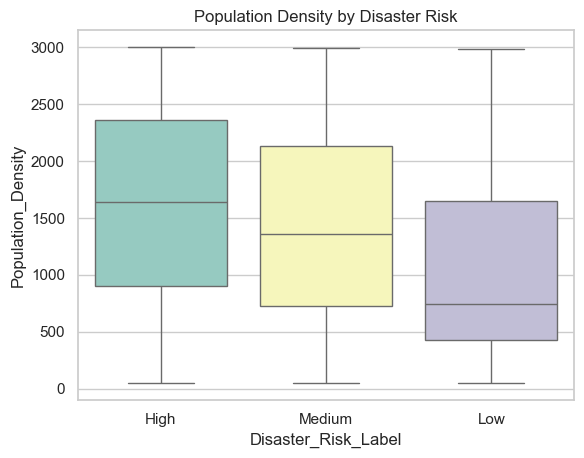

In [16]:
# Boxplot for detecting outlier
sns.boxplot(data=df, x='Disaster_Risk_Label', y='Population_Density', palette='Set3')
plt.title("Population Density by Disaster Risk")
plt.show()


C:\Users\asus\AppData\Local\Temp\ipykernel_12664\3959188376.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Disaster_Risk_Label', y='House_Affected', palette='Set1')


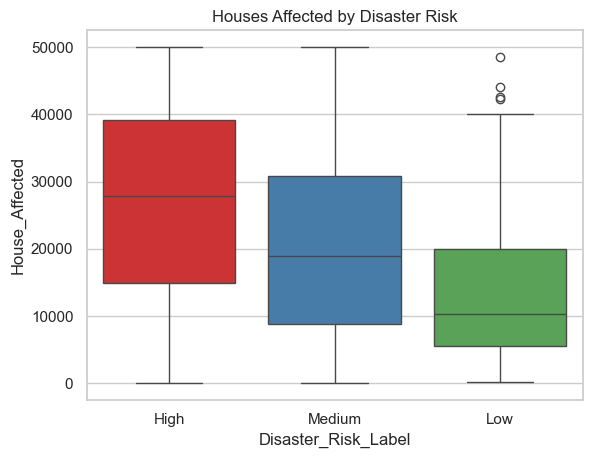

In [17]:
# House Affected by Risk
sns.boxplot(data=df, x='Disaster_Risk_Label', y='House_Affected', palette='Set1')
plt.title("Houses Affected by Disaster Risk")
plt.show()


In [18]:
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df


In [19]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


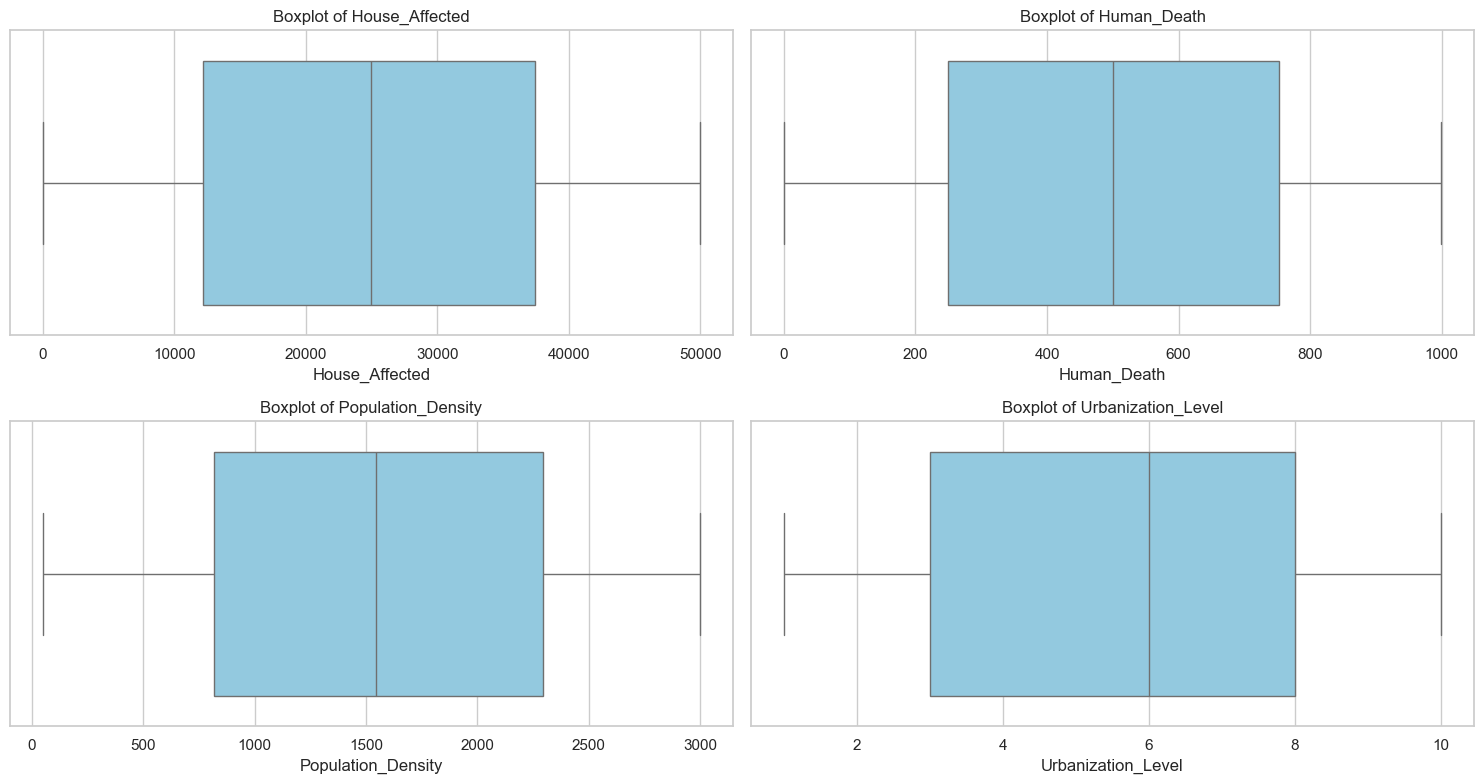

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot boxplots for each numerical column
numerical_columns = ['House_Affected', 'Human_Death', 'Population_Density', 'Urbanization_Level']
plt.figure(figsize=(15, 8))

for i, col in enumerate(numerical_columns):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


# Feature Engineering

In [21]:
from sklearn.preprocessing import LabelEncoder

# Feature Engineering
df['Risk_Index'] = df['Disaster_History_Score'] * 0.5 + df['Population_Density'] * 0.3 + df['Urbanization_Level'] * 0.2
df['Damage_Scale'] = df['House_Affected'] + (df['Human_Death'] * 10)  # deaths are weighted more

# Encode labels
le = LabelEncoder()
df['Risk_Label_Code'] = le.fit_transform(df['Disaster_Risk_Label'])

# Final features
features = ['Disaster_History_Score', 'Population_Density', 'Urbanization_Level', 
            'House_Affected', 'Human_Death', 'Elevation', 'Disaster_Risk_Label']

X = df[features]
y = df['Risk_Label_Code']


# Model Training

In [22]:
# Example mapping for ordinal categories
ordinal_mapping = {
    'Low': 0,
    'Medium': 1,
    'High': 2
}

# Apply mapping
df['Urbanization_Level'] = df['Urbanization_Level'].map(ordinal_mapping)
df['Damage_Scale'] = df['Damage_Scale'].map(ordinal_mapping)


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix
import pandas as pd

# Sample ordinal encoding
ordinal_map = {'Low': 0, 'Medium': 1, 'High': 2}
df['Urbanization_Level'] = df['Urbanization_Level'].map(ordinal_map)
df['Damage_Scale'] = df['Damage_Scale'].map(ordinal_map)

# Include 'Elevation' in features
X = df[['Disaster_History_Score', 'Population_Density', 'Urbanization_Level',
        'House_Affected', 'Human_Death', 'Risk_Index', 'Damage_Scale', 'Elevation']]
y = df['Disaster_Risk_Label']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Print results
print("Accuracy Score:", accuracy)
print("F1 Score:", f1)
print("Recall Score:", recall)
print("Confusion Matrix:\n", conf_matrix)


Accuracy Score: 0.942
F1 Score: 0.9401771406836211
Recall Score: 0.942
Confusion Matrix:
 [[1059    0   14]
 [   0   40   22]
 [  51    0  314]]


In [24]:
print(df.columns.tolist())

['Latitude', 'Longitude', 'Elevation', 'Disaster_History_Score', 'Population_Density', 'Urbanization_Level', 'House_Affected', 'Human_Death', 'Disaster_Risk_Label', 'State_Andhra Pradesh', 'State_Assam', 'State_Bihar', 'State_Chhattisgarh', 'State_Delhi', 'State_Gujarat', 'State_Haryana', 'State_Jharkhand', 'State_Karnataka', 'State_Kerala', 'State_Madhya Pradesh', 'State_Maharashtra', 'State_Odisha', 'State_Punjab', 'State_Rajasthan', 'State_Tamil Nadu', 'State_Uttar Pradesh', 'State_West Bengal', 'Risk_Index', 'Damage_Scale', 'Risk_Label_Code']


In [25]:
pip install geopy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Latitude                5000 non-null   float64
 1   Longitude               5000 non-null   float64
 2   Elevation               5000 non-null   int64  
 3   Disaster_History_Score  5000 non-null   int64  
 4   Population_Density      5000 non-null   int64  
 5   Urbanization_Level      0 non-null      float64
 6   House_Affected          5000 non-null   int64  
 7   Human_Death             5000 non-null   int64  
 8   Disaster_Risk_Label     5000 non-null   object 
 9   State_Andhra Pradesh    5000 non-null   bool   
 10  State_Assam             5000 non-null   bool   
 11  State_Bihar             5000 non-null   bool   
 12  State_Chhattisgarh      5000 non-null   bool   
 13  State_Delhi             5000 non-null   bool   
 14  State_Gujarat           5000 non-null   

In [28]:
import folium
from folium.plugins import MarkerCluster
import pandas as pd

# Initialize map centered around India
m = folium.Map(location=[22.5937, 78.9629], zoom_start=5, tiles='CartoDB positron')

# Define a function to get marker color based on the disaster risk label
def get_marker_color(risk_label):
    """Assigns a color based on the disaster risk label."""
    if risk_label == 'High':
        return 'red'
    elif risk_label == 'Medium':
        return 'orange'
    else:
        return 'green'

# Add markers to the map using MarkerCluster for better interaction
marker_cluster = MarkerCluster().add_to(m)

# Loop over each row in the dataset
for i, row in df.iterrows():
    if pd.notnull(row['Latitude']) and pd.notnull(row['Longitude']) and pd.notnull(row['Disaster_Risk_Label']):
        # Assuming state flags are stored in columns like 'Bihar', 'Assam' etc.
        states = [state for state in df.columns[9:-3] if row[state] is True]

        if states:
            # Convert ordinal encoded Urbanization Level and Damage Scale back to string (if needed)
            urbanization_dict = {0: "Low", 1: "Medium", 2: "High"}
            damage_scale_dict = {0: "Low", 1: "Medium", 2: "High"}

            urbanization = urbanization_dict.get(row['Urbanization_Level'], row['Urbanization_Level'])
            damage_scale = damage_scale_dict.get(row['Damage_Scale'], row['Damage_Scale'])

            # Create popup content with clean HTML formatting
            popup_content = f"""
                <b>State(s):</b> {', '.join(states)}<br>
                <b>Disaster Risk:</b> <span style='color:{get_marker_color(row['Disaster_Risk_Label'])}'>{row['Disaster_Risk_Label']}</span><br>
                <b>Population Density:</b> {row['Population_Density']}<br>
                <b>Urbanization Level:</b> {urbanization}<br>
                <b>House Affected:</b> {row['House_Affected']}<br>
                <b>Human Deaths:</b> {row['Human_Death']}<br>
                <b>Elevation (m):</b> {row['Elevation']}<br>
                <b>Risk Index:</b> {row['Risk_Index']}<br>
                <b>Damage Scale:</b> {['damage_scale'] }          """

            folium.Marker(
                location=[row['Latitude'], row['Longitude']],
                popup=folium.Popup(popup_content, max_width=350),
                icon=folium.Icon(color=get_marker_color(row['Disaster_Risk_Label']))
            ).add_to(marker_cluster)

# Save the final map to an HTML file
m.save("disaster_risk_map.html")


# Deploy the model

In [29]:
import joblib

# Save your trained model
joblib.dump(model, 'disaster_model.pkl')


['disaster_model.pkl']